In [1]:
#imports numpy library
#imports pandas library
#imports LabelEncoder class from the sklearn.preprocessing module
#imports matplotlib.pyplot module
#imports nltk package, which provides resources for natural language processing
#imports Seaborn data visualization library
#imports PorterStemmer to avoid the stemming
#imports the stopwords module from the nltk.corpus package.
#imports built-in string module in Python.
#imports the WordCloud class from the wordcloud package
#Imports counter
#imports classes for vectorizing text data into numerical feature vectors
#imports function to split a dataset into training and testing sets
#imports decision tree algorithm for classification tasks
#imports random forest algorithm for classification tasks
#imports GaussianNB, MultinomialNB and BernoulliNB from sklearn.naive_bayes

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [2]:
#reading the dataset
df = pd.read_csv('Email Spam.csv', encoding='ISO-8859-1')

In [3]:
#checking the data head
df.sample(7)

,Unnamed: 0,Body,Label
3420,3710,Forwarded-by: Nev Dull \nForwarded-by: Gary Bi...,0
2693,2983,"Hiya, I just myself an rpm, and when I did -Uv...",0
4284,4574,"OK, I guess that sysctl.conf is the best way ...",0
2064,2277,-----Original Message-----\nFrom: fork-admin@x...,0
3534,3824,URL: http://www.mozillazine.org/weblogs/hyatt/...,0
1964,2177,"I posted about this last week, and I'm still s...",0
689,689,"Hello ~name~,If you ordered a flat-rate domest...",1


In [4]:
df.shape

(5042, 3)

In [5]:
#Three unnamed columns are there which need to be dropped
df.drop(columns=['Unnamed: 0'],inplace=True)

In [6]:
#checking the data head
df.head()

,Body,Label
0,Save up to 70% on Life Insurance.\nWhy Spend M...,1
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,##############################################...,1
4,I thought you might like these:\n1) Slim Down ...,1


In [7]:
# Changing the column names
df.rename(columns={'Body':'email','Label':'target'}, inplace=True)

In [8]:
#checking the data head
df.head()

,email,target
0,Save up to 70% on Life Insurance.\nWhy Spend M...,1
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,##############################################...,1
4,I thought you might like these:\n1) Slim Down ...,1


# Data Cleaning

In [9]:
#finding the missing values
df.isnull().sum()

email     1
target    0
dtype: int64

In [10]:
#dropping the null body
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

email     0
target    0
dtype: int64

In [12]:
df.head()

,email,target
0,Save up to 70% on Life Insurance.\nWhy Spend M...,1
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,##############################################...,1
4,I thought you might like these:\n1) Slim Down ...,1


In [13]:
#checking the duplicate values
df.duplicated().sum()

689

In [14]:
#removing the duplicate data
df = df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(4352, 2)

# Exploratory Data Analysis(EDA)

In [17]:
#counting the total number of ham and spam value
df['target'].value_counts()

0    3016
1    1336
Name: target, dtype: int64

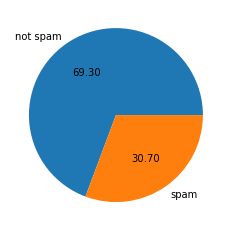

In [18]:
#creating pie chart to visualize the distribution of values in the 'detect' for ham and spam sms data
plt.pie(df['target'].value_counts(), labels=['not spam','spam'],autopct="%0.2f")
#show thepie chart
plt.show()

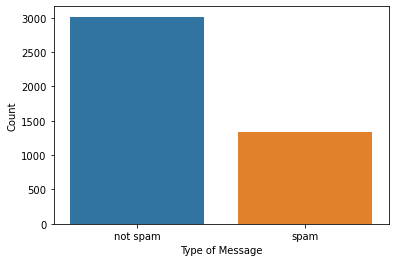

In [19]:
#generating a bar chart of the 'detect' column in the DataFrame 'df' using Seaborn's countplot() function
sns.countplot(data=df, x='target')
plt.xlabel('Type of Message')
plt.ylabel('Count')
plt.xticks([0, 1], ['not spam', 'spam'])
plt.show()

In [20]:
#adding a new column to the DataFrame containing the number of characters in each sms
df['character_number'] = df['email'].apply(len)

In [21]:
df.sample(7)

,email,target,character_number
5009,"this just struck me as odd, but interesting in...",0,295
4696,Did someone invert the spam filters? I'm getti...,0,205
1913,"Hi,some time now the following messages were h...",0,879
2984,"On Wed, 28 Aug 2002 17:45:49 -0700\nBrian McNe...",0,794
1471,"As seen on NBC, CBS, CNN, and even Oprah! The ...",1,1021
3417,use Perl Daily NewsletterIn this issue:\n *...,0,1954
4976,"Sorry, gang, but I've flipped the switch. If y...",0,407


In [22]:
#adding a new column to the DataFrame containing the number of words in each sms
df['word_number'] = df['email'].apply(lambda x:len(nltk.word_tokenize(x)))

In [23]:
df.sample(7)

,email,target,character_number,word_number
4002,"URL: http://www.newsisfree.com/click/-2,866494...",0,204,30
4878,Gary Lawrence Murphy:\n>Back before they had s...,0,509,85
772,WAKE UP!\n \nHere's the deal: Mortgage interes...,1,736,178
1166,New Page 1Reach the Masses\nDirect E-Mail\nAdv...,1,497,86
2373,"Yes, it is. You just want to be called a libe...",0,447,109
1464,"Dear cypherpunks ,\nÃÂ ÃÂ ÃÂ ÃÂ ÃÂ ÃÂ Ã...",1,3281,507
2798,"Once upon a time, Thomas wrote :> > On Sun, 29...",0,1199,201


In [24]:
#adding a new column to the DataFrame containing the number of sentences in each sms
df['sentence_number'] = df['email'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [25]:
df.sample(7)

,email,target,character_number,word_number,sentence_number
907,"Dear Justin,\t\n\t\t\t\t\tNet Nation IT Recrui...",1,3491,702,32
2793,"Hi folks, I just uploaded RPMS of the new neta...",0,527,76,2
2325,"Hmm, if the shoe fits... I think these five at...",0,1750,339,12
3958,URL: http://diveintomark.org/archives/2002/10/...,0,7267,1511,47
4418,"Hi all,I have a debian machine with an externa...",0,833,166,7
4851,Don't know if everybody knows this trick...Put...,0,1960,393,21
3171,"Shouldn't there be a w, somewhere in tehre? S...",0,2588,559,17


In [26]:
df.shape

(4352, 5)

In [27]:
#generating descriptive statistics for the 'character_number', 'word_number', and 'sentence_number'
df[['character_number','word_number','sentence_number']].describe()

,character_number,word_number,sentence_number
count,4352.000000,4352.000000,4352.000000
mean,1751.679458,326.323759,11.729320
std,4248.164995,695.867967,25.237384
min,1.000000,0.000000,0.000000
25%,531.000000,97.000000,4.000000
50%,965.000000,180.500000,7.000000
75%,1662.500000,321.000000,11.000000
max,134625.000000,16479.000000,573.000000


In [28]:
#generating descriptive statistics of HAM records for the 'character_number', 'word_number', and 'sentence_number'
df[df['target'] == 0][['character_number','word_number','sentence_number']].describe()

,character_number,word_number,sentence_number
count,3016.000000,3016.000000,3016.000000
mean,1437.488395,279.946950,9.570955
std,3187.017936,590.801917,20.904718
min,5.000000,1.000000,1.000000
25%,466.750000,87.000000,3.000000
50%,880.500000,172.000000,6.000000
75%,1498.000000,300.000000,10.000000
max,87972.000000,16479.000000,573.000000


In [29]:
#generating descriptive statistics of SPAM records for the 'character_number', 'word_number', and 'sentence_number'
df[df['target'] == 1][['character_number','word_number','sentence_number']].describe()

,character_number,word_number,sentence_number
count,1336.000000,1336.000000,1336.000000
mean,2460.961078,431.018713,16.601796
std,5928.957569,879.814088,32.474919
min,1.000000,0.000000,0.000000
25%,676.000000,120.000000,5.000000
50%,1109.500000,201.000000,9.000000
75%,2213.750000,414.000000,15.000000
max,134625.000000,13290.000000,404.000000


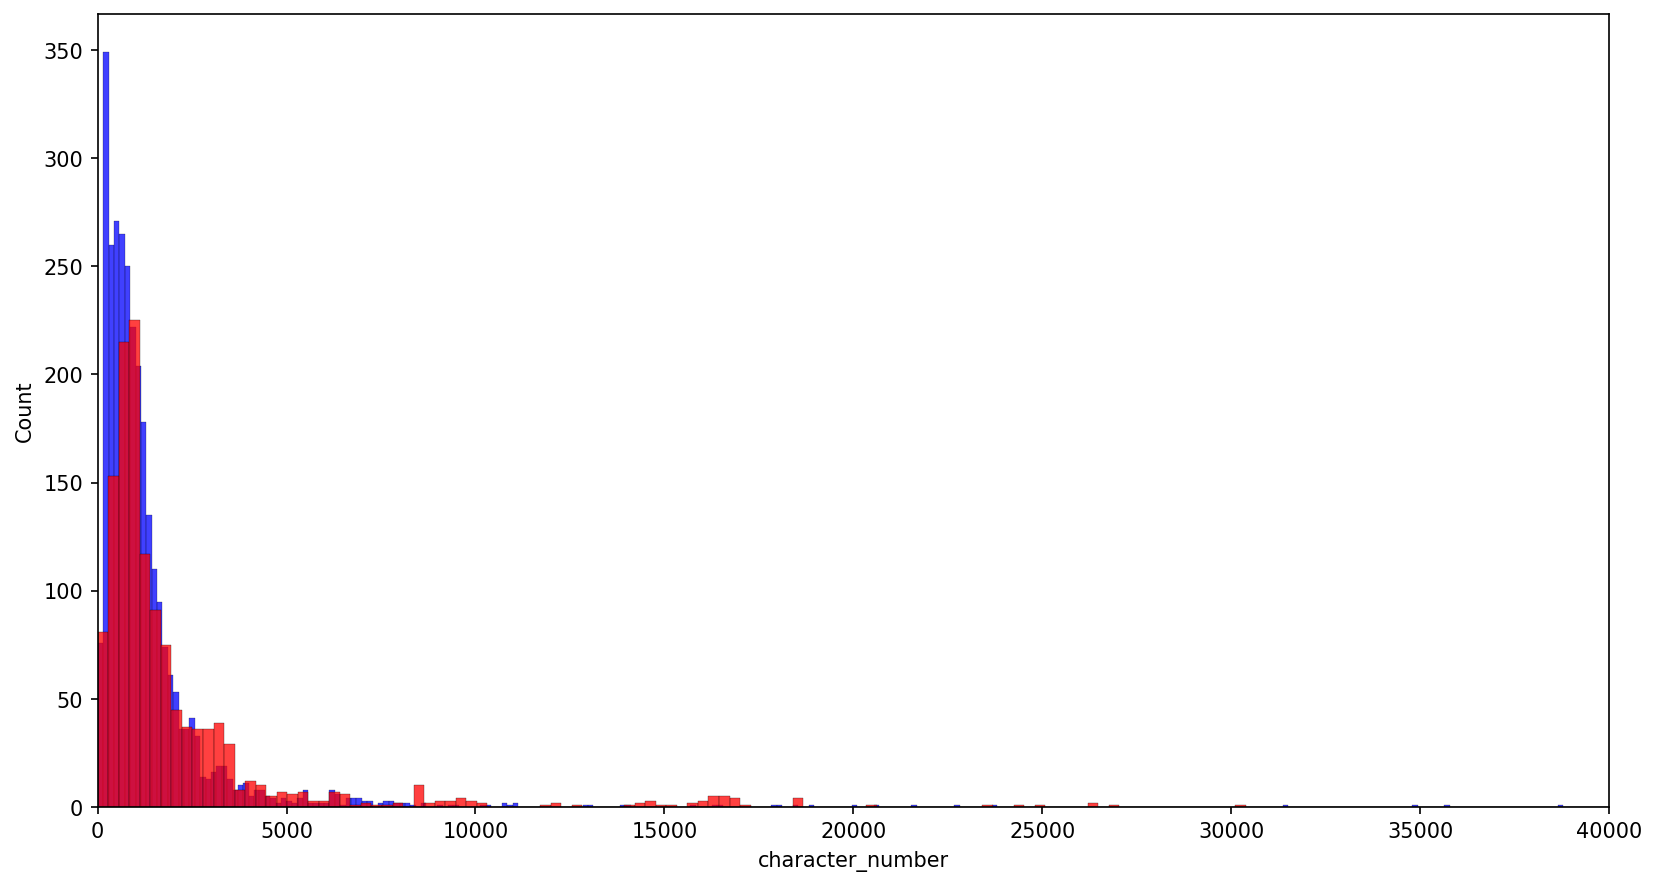

In [30]:
#Creating a figure with a specific size and generate two histograms of character counts for 'ham' and 'spam'
plt.figure(figsize=(13,7), dpi=150)
sns.histplot(df[df['target'] == 0]['character_number'],color='blue')
sns.histplot(df[df['target'] == 1]['character_number'],color='red')
plt.xlim(0, 40000)
plt.show()

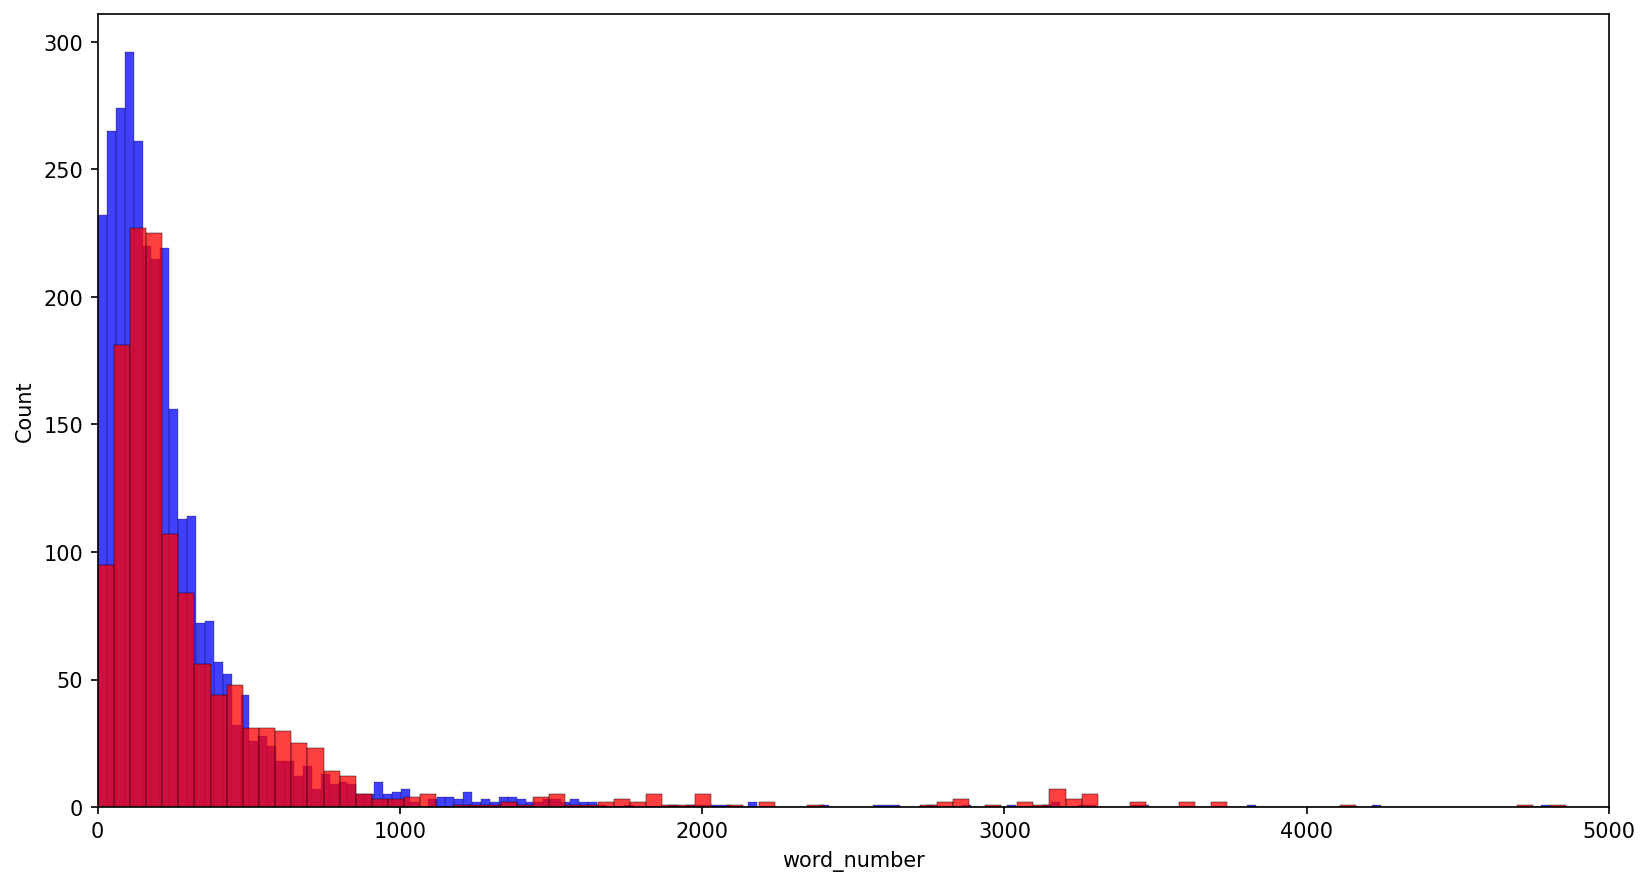

In [31]:
#Creating a figure with a specific size and generate two histograms of character counts for 'ham' and 'spam'
plt.figure(figsize=(13,7), dpi=150)
sns.histplot(df[df['target'] == 0]['word_number'],color='blue')
sns.histplot(df[df['target'] == 1]['word_number'],color='red')
plt.xlim(0, 5000)
plt.show()

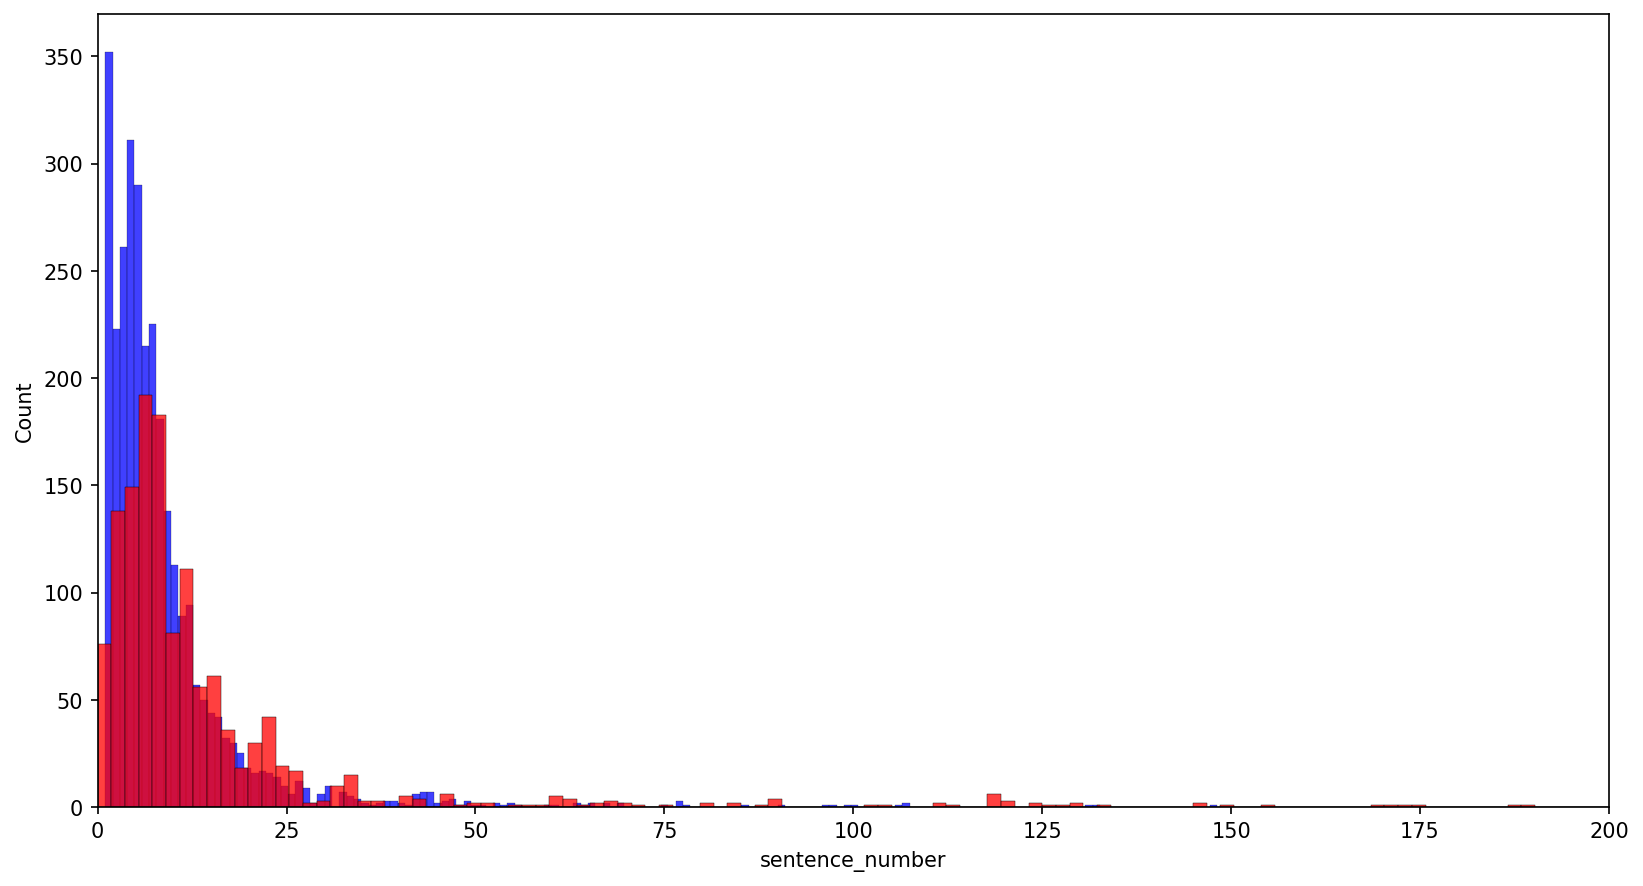

In [32]:
#Creating a figure with a specific size and generate two histograms of character counts for 'ham' and 'spam'
plt.figure(figsize=(13,7), dpi=150)
sns.histplot(df[df['target'] == 0]['sentence_number'],color='blue')
sns.histplot(df[df['target'] == 1]['sentence_number'],color='red')
plt.xlim(0, 200)
plt.show()

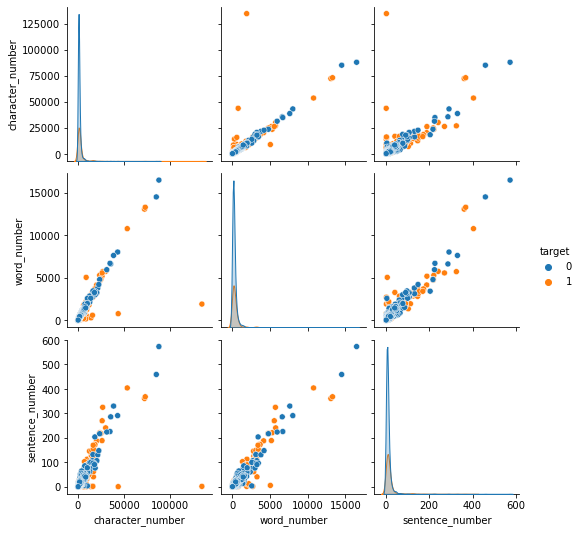

In [33]:
#generating a pair plot using Seaborn's pairplot() function, with 'detect' used to differentiate between 'ham' and 'spam' messages
sns.pairplot(df,hue='target')


<AxesSubplot:>

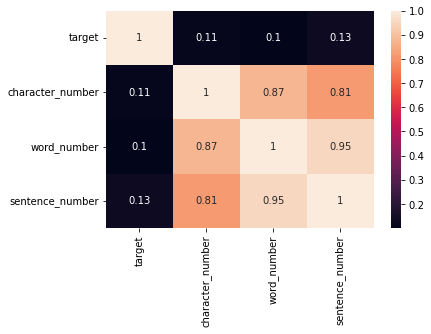

In [34]:
#generating heatmap of the correlation matrix using Seaborn's heatmap() function, with numerical values displayed on the plot
sns.heatmap(df.corr(),annot=True)

# Data Preprocessing

In [35]:
ps = PorterStemmer()
def transform_email(email):
    # Convert the string to lowercase
    email = email.lower()
    # Tokenize the string into words
    email = nltk.word_tokenize(email)
    
    # Remove non-alphanumeric characters
    y = []
    for i in email:
        if i.isalnum():
            y.append(i)
    
    # Remove stopwords and punctuation
    email = y[:]
    y.clear()
    
    for i in email:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    # Apply stemming to reduce words to their base form
    sms = y[:]
    y.clear()
    
    for i in email:
        y.append(ps.stem(i))
    
    # Join the words back into a single string        
    return " ".join(y)

In [36]:
#adding final column where transformed data stores
df['transformed_email'] = df['email'].apply(transform_email)

In [37]:
df.sample(7)

,email,target,character_number,word_number,sentence_number,transformed_email
2139,"On Wednesday 04 September 2002 10:59 pm, CDale...",0,902,171,9,on wednesday 04 septemb 2002 pm cdale wrote so...
3127,http://www.hughes-family.org/bugzilla/show_bug...,0,3342,674,25,http addit comment from i thought about thi an...
4572,Is there a relatively clean way to dynamically...,0,2065,380,12,is there a rel clean way to dynam build comp f...
563,Do you owe money? Is it getting troublesome ke...,1,1169,249,12,do you owe money is it get troublesom keep tra...
341,Are you interested in making some extra money ...,1,1313,265,15,are you interest in make some extra money on t...
5026,hello!\nwell in my eyes something like a publi...,0,570,90,2,hello well in my eye someth like a public cont...
1078,MCLE Seminars\nClick \n here \n ...,1,2001,267,9,mcle seminar click here to be remov from our e...


In [38]:
#A WordCloud object is created with a width of 600 pixels, height of 600 pixels, a minimum font size of 12 pixels, and a white background color
wc = WordCloud(width=600,height=600,min_font_size=12,background_color='white')
#The generate method of the WordCloud object is called with the transformed SMS messages that are classified as spam.
spam_wc = wc.generate(df[df['target'] == 1]['transformed_email'].str.cat(sep=" "))

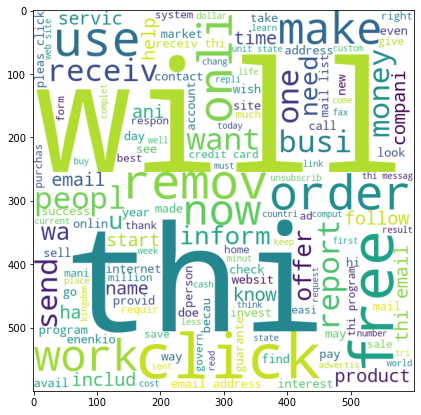

In [39]:
#A figure object with a width of 16 inches and height of 7 inches is created using the figure method of the pyplot module
plt.figure(figsize=(16,7))
#The resulting image is shown in the output by passinf the spam_wc variable
plt.imshow(spam_wc)

In [40]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_email'].str.cat(sep=" "))

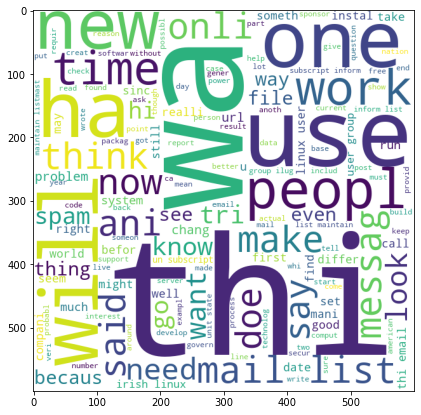

In [41]:
plt.figure(figsize=(16,7))
plt.imshow(ham_wc)

In [42]:
#creates an empty list
spam_corpus = []
#initiates a for loop that iterates through each transformed text message where target is a spam
for msg in df[df['target'] == 1]['transformed_email'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [43]:
#Total number of detected spam words
len(spam_corpus)

416576

/Users/debmalyadeb/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


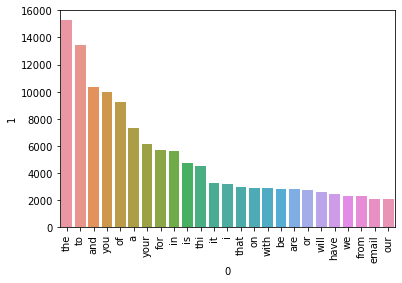

In [44]:
#creates a barplot using Seaborn library with most common 25 spam words
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(25))[0],pd.DataFrame(Counter(spam_corpus).most_common(25))[1])
#rotates the x-axis tick labels vertically
plt.xticks(rotation='vertical')
#shows the plot
plt.show()

In [45]:
#creates an empty list
ham_corpus = []
#initiates a for loop that iterates through each transformed text message where target is a ham
for msg in df[df['target'] == 0]['transformed_email'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [46]:
#Total number of detected ham words
len(ham_corpus)

598813

/Users/debmalyadeb/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


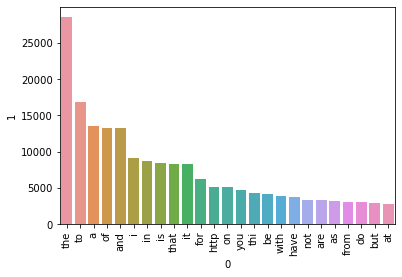

In [47]:
#creates a barplot using Seaborn library with most common 25 ham words
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(25))[0],pd.DataFrame(Counter(ham_corpus).most_common(25))[1])
#rotates the x-axis tick labels vertically
plt.xticks(rotation='vertical')
#shows the plot
plt.show()

# Model Building

Using CountVectorizer

In [48]:
# create a CountVectorizer object
cv = CountVectorizer()

In [49]:
#uses the fit_transform() method of the CountVectorizer object (cv) to convert the text data in the transformed_email column of the DataFrame df into a matrix of token counts
X = cv.fit_transform(df['transformed_email']).toarray()

In [50]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [51]:
X.shape

(4352, 27168)

In [52]:
#extracts the target variable from the DataFrame df and creates a NumPy array y containing the values of the target variable.
y = df['target'].values

In [53]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [54]:
#uses the train_test_split function from scikit-learn to split the data into training and testing sets for use in a machine learning model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [55]:
#create three different Naive Bayes classifiers, each with a different assumption about the distribution of the input features
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [56]:
#fit the Gaussian Naive Bayes classifier on the training data X_train and y_train, and use it to make predictions on the testing data X_test. The predictions are stored in the y_pred1 variable.
gnb.fit(X_train,y_train)
#The predictions are stored in the y_pred1 variable.
y_pred1 = gnb.predict(X_test)
#accuracy_score() and precision_score() functions from scikit-learn are then used to evaluate the performance
print("GaussianNB Accuracy is ",accuracy_score(y_test,y_pred1))
print("GaussianNB Precision is ",precision_score(y_test,y_pred1))
print("GaussianNB F1 Score is ",f1_score(y_test,y_pred1))
print("GaussianNB Recall Score is ",recall_score(y_test,y_pred1))


GaussianNB Accuracy is  0.9180704441041347
GaussianNB Precision is  0.8735083532219571
GaussianNB F1 Score is  0.8724672228843862
GaussianNB Recall Score is  0.8714285714285714


In [57]:
#fit the Multinomial Naive Bayes classifier on the training data X_train and y_train, and use it to make predictions on the testing data X_test. The predictions are stored in the y_pred1 variable.
mnb.fit(X_train,y_train)
#The predictions are stored in the y_pred2 variable.
y_pred2 = mnb.predict(X_test)
#accuracy_score() and precision_score() functions from scikit-learn are then used to evaluate the performance
print("MultinomialNB Accuracy Score is ",accuracy_score(y_test,y_pred2))
print("MultinomialNB Precision Score is ",precision_score(y_test,y_pred2))
print("MultinomialNB F1 Score is ",f1_score(y_test,y_pred2))
print("MultinomialNB Recall Score is ",recall_score(y_test,y_pred2))

MultinomialNB Accuracy Score is  0.9839203675344563
MultinomialNB Precision Score is  0.9830508474576272
MultinomialNB F1 Score is  0.9747899159663865
MultinomialNB Recall Score is  0.9666666666666667


In [58]:
#fit the Bernoulli Naive Bayes classifier on the training data X_train and y_train, and use it to make predictions on the testing data X_test. The predictions are stored in the y_pred1 variable.
bnb.fit(X_train,y_train)
#The predictions are stored in the y_pred3 variable.
y_pred3 = bnb.predict(X_test)
#accuracy_score() and precision_score() functions from scikit-learn are then used to evaluate the performance
print("BernoulliNB Accuracy is ",accuracy_score(y_test,y_pred3))
print("BernoulliNB Precision is ",precision_score(y_test,y_pred3))
print("BernoulliNB F1 Score is ",f1_score(y_test,y_pred3))
print("BernoulliNB Recall Score is ",recall_score(y_test,y_pred3))

BernoulliNB Accuracy is  0.8966309341500766
BernoulliNB Precision is  0.9014084507042254
BernoulliNB F1 Score is  0.8258064516129031
BernoulliNB Recall Score is  0.7619047619047619


# Using TfidfVectorizer

In [191]:
#creates a TfidfVectorizer object, which is used to transform the text data into a numerical representation that can be used in machine learning algorithms
tfidf = TfidfVectorizer()

# Using TfidfVectorizer where max_features=3000

In [139]:
#TfidfVectorizer object will include only the 3000 most frequently occurring words in the corpus,
tfidf = TfidfVectorizer(max_features=3000)

In [192]:
#transform the preprocessed text data (df['transformed_sms']) into a numerical feature matrix (X)
X = tfidf.fit_transform(df['transformed_email']).toarray()

In [193]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [194]:
#Shape of the X variable
X.shape

(4352, 27168)

In [195]:
#creates a NumPy array y containing the values of the 'target' column from the DataFrame df
y = df['target'].values

In [196]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [197]:
#splitting a dataset into training and testing sets. 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [198]:
X_train.shape

(3046, 27168)

In [199]:
X_test.shape

(1306, 27168)

In [148]:
#fit the Gaussian Naive Bayes classifier on the training data X_train and y_train, and use it to make predictions on the testing data X_test. The predictions are stored in the y_pred1 variable.
gnb.fit(X_train,y_train)
#The predictions are stored in the y_pred1 variable.
y_pred1 = gnb.predict(X_test)
#accuracy_score() and precision_score() functions from scikit-learn are then used to evaluate the performance
print("GaussianNB Accuracy is ",accuracy_score(y_test,y_pred1))
print("GaussianNB Precision is ",precision_score(y_test,y_pred1))
print("MultinomialNB F1 Score is ",f1_score(y_test,y_pred1))
print("MultinomialNB Recall Score is ",recall_score(y_test,y_pred1))

GaussianNB Accuracy is  0.9372128637059725
GaussianNB Precision is  0.9225
MultinomialNB F1 Score is  0.9
MultinomialNB Recall Score is  0.8785714285714286


In [149]:
#fit the Multinomial Naive Bayes classifier on the training data X_train and y_train, and use it to make predictions on the testing data X_test. The predictions are stored in the y_pred1 variable.
mnb.fit(X_train,y_train)
#The predictions are stored in the y_pred2 variable.
y_pred2 = mnb.predict(X_test)
#accuracy_score() and precision_score() functions from scikit-learn are then used to evaluate the performance
print("MultinomialNB Accuracy Score is ",accuracy_score(y_test,y_pred2))
print("MultinomialNB Precision Score is ",precision_score(y_test,y_pred2))
print("MultinomialNB F1 Score is ",f1_score(y_test,y_pred2))
print("MultinomialNB Recall Score is ",recall_score(y_test,y_pred2))


MultinomialNB Accuracy Score is  0.9739663093415007
MultinomialNB Precision Score is  0.9873737373737373
MultinomialNB F1 Score is  0.9583333333333335
MultinomialNB Recall Score is  0.930952380952381


In [150]:
#fit the Bernoulli Naive Bayes classifier on the training data X_train and y_train, and use it to make predictions on the testing data X_test. The predictions are stored in the y_pred1 variable.
bnb.fit(X_train,y_train)
#The predictions are stored in the y_pred3 variable.
y_pred3 = bnb.predict(X_test)
#accuracy_score() and precision_score() functions from scikit-learn are then used to evaluate the performance
print("BernoulliNB Accuracy is ",accuracy_score(y_test,y_pred3))
print("BernoulliNB Precision is ",precision_score(y_test,y_pred3))
print("MultinomialNB F1 Score is ",f1_score(y_test,y_pred3))
print("MultinomialNB Recall Score is ",recall_score(y_test,y_pred3))

BernoulliNB Accuracy is  0.9119448698315467
BernoulliNB Precision is  0.9045092838196287
MultinomialNB F1 Score is  0.8557089084065246
MultinomialNB Recall Score is  0.8119047619047619


# DecisionTreeClassifier, RandomForestClassifier And Naive Bayes comparison

In [151]:
#Creates an instance of the DecisionTreeClassifier class with a maximum depth of 5
dtc = DecisionTreeClassifier(max_depth=5)
#Creates an instance of the RandomForestClassifier 
rfc = RandomForestClassifier(n_estimators=50, random_state=42)

In [152]:
#creates a dictionary clfs that maps the names of different classifiers to the actual classifier objects
clfs = {
    'DecisionTreeClassifier': dtc,
    'RandomForestClassifier': rfc,
    'Naive_Bayes':mnb
}

In [153]:
#defines a function called train_classifier that takes in five arguments
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test,y_pred)
    
    return accuracy,precision,f1,recall

In [154]:
#calling the train_classifier function with the dtc arugument
train_classifier(dtc,X_train,y_train,X_test,y_test)

(0.9173047473200613,
 0.9193548387096774,
 0.8636363636363636,
 0.8142857142857143)

In [155]:
#calling the train_classifier function with the rfc arugument
train_classifier(rfc,X_train,y_train,X_test,y_test)

(0.9732006125574273, 0.9848866498740554, 0.9571603427172583, 0.930952380952381)

In [156]:
#creates three empty lists to store the accuracy and precision scores for each classifier
accuracy_scores = []
precision_scores = []
f1_scores = []
recall_scores = []
#iterates over the items in the clfs dictionary, which contains the names of the classifiers as keys and the classifier objects as values
for name,clf in clfs.items():
    
    current_accuracy,current_precision,current_f1,current_recall = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("F1 Score - ",current_f1)
    print("Recall Score - ",current_recall)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    f1_scores.append(current_f1)
    recall_scores.append(current_recall)
    

For  DecisionTreeClassifier
Accuracy -  0.9165390505359877
Precision -  0.9168900804289544
F1 Score -  0.862547288776797
Recall Score -  0.8142857142857143
For  RandomForestClassifier
Accuracy -  0.9732006125574273
Precision -  0.9848866498740554
F1 Score -  0.9571603427172583
Recall Score -  0.930952380952381
For  Naive_Bayes
Accuracy -  0.9739663093415007
Precision -  0.9873737373737373
F1 Score -  0.9583333333333335
Recall Score -  0.930952380952381


In [137]:
#creates a pandas DataFrame object

performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,'F1':f1_scores, 'Recall' :recall_scores}).sort_values('Precision',ascending=False)



In [138]:
performance_df

,Algorithm,Accuracy,Precision,F1,Recall
2,Naive_Bayes,0.905819,1.000000,0.828452,0.707143
1,RandomForestClassifier,0.970138,0.997389,0.951432,0.909524
0,DecisionTreeClassifier,0.919602,0.931507,0.866242,0.809524


In [80]:
#function is used to transform the DataFrame performance_df from "wide" to "long" format. Specifically, it "unpivots" the DataFrame by melting the columns
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")


In [81]:
performance_df1

,Algorithm,variable,value
0,Naive_Bayes,Accuracy,0.973966
1,RandomForestClassifier,Accuracy,0.973201
2,DecisionTreeClassifier,Accuracy,0.916539
3,Naive_Bayes,Precision,0.987374
4,RandomForestClassifier,Precision,0.984887
5,DecisionTreeClassifier,Precision,0.916890
6,Naive_Bayes,F1,0.958333
7,RandomForestClassifier,F1,0.957160
8,DecisionTreeClassifier,F1,0.862547
9,Naive_Bayes,Recall,0.930952


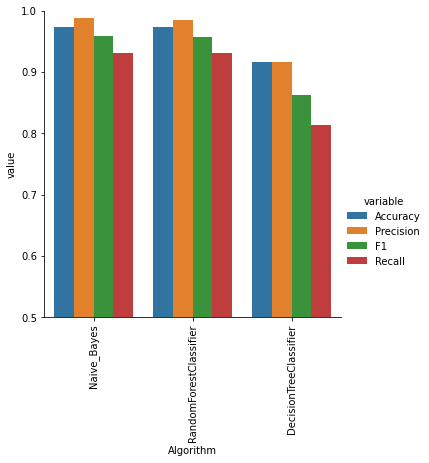

In [82]:
#generates a bar plot using Seaborn's catplot() function to visualize the accuracy, precision and f1 scores of the classifiers stored in the DataFrame 
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# Set the max_features parameter to 3000 of TfIdf

In [157]:
#creates a new DataFrame temp_df with four columns: 'Algorithm', 'Accuracy_max_ft_3000', 'Precision_max_ft_3000', and 'F1_max_ft_3000'
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores,'F1_max_ft_3000':f1_scores, 'Recall_max_ft_3000':recall_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [158]:
temp_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000,F1_max_ft_3000,Recall_max_ft_3000
2,Naive_Bayes,0.973966,0.987374,0.958333,0.930952
1,RandomForestClassifier,0.973201,0.984887,0.957160,0.930952
0,DecisionTreeClassifier,0.916539,0.916890,0.862547,0.814286


In [159]:
#merges the two DataFrames performance_df and temp_df on the 'Algorithm' column and creates a new DataFrame new_df.
new_df = performance_df.merge(temp_df,on='Algorithm')

In [160]:
new_df

,Algorithm,Accuracy,Precision,F1,Recall,Accuracy_max_ft_3000,Precision_max_ft_3000,F1_max_ft_3000,Recall_max_ft_3000
0,Naive_Bayes,0.905819,1.000000,0.828452,0.707143,0.973966,0.987374,0.958333,0.930952
1,RandomForestClassifier,0.970138,0.997389,0.951432,0.909524,0.973201,0.984887,0.957160,0.930952
2,DecisionTreeClassifier,0.919602,0.931507,0.866242,0.809524,0.916539,0.916890,0.862547,0.814286


# DecisionTreeClassifier, RandomForestClassifier using Xgboost

In [161]:
import xgboost as xgb

# Initializes an instance of the XGBClassifier class with a maximum depth of 5
xgb_dtc = xgb.XGBClassifier(max_depth=5)

# Initializes an instance of the XGBClassifier class with 50 estimators and random state 42
xgb_rf = xgb.XGBRFClassifier(n_estimators=50, random_state=42)


In [162]:
#creates a dictionary clfs that maps the names of different classifiers to the actual classifier objects
clfs1 = {
    'xgboost_DecisionTreeClassifier': xgb_dtc,
    'xgboost_RandomForestClassifier': xgb_rf,
}

# Using TfidfVectorizer

In [163]:
#creates a TfidfVectorizer object, which is used to transform the text data into a numerical representation that can be used in machine learning algorithms
tfidf = TfidfVectorizer()


# Using TfidfVectorizer where max_features=3000

In [176]:
#TfidfVectorizer object will include only the 3000 most frequently occurring words in the corpus,
tfidf = TfidfVectorizer(max_features=3000)

In [177]:
#transform the preprocessed text data (df['transformed_email']) into a numerical feature matrix (X)
X = tfidf.fit_transform(df['transformed_email']).toarray()

In [178]:
#creates a NumPy array y containing the values of the 'target' column from the DataFrame df
y = df['target'].values

In [179]:
#splitting a dataset into training and testing sets. 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [180]:
#defines a function called train_classifier that takes in five arguments
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test,y_pred)
    
    return accuracy,precision,f1,recall

In [181]:
#calling the train_classifier function with the xgb_dtc arugument
train_classifier(xgb_dtc,X_train,y_train,X_test,y_test)

(0.9793261868300153,
 0.9900249376558603,
 0.9671132764920828,
 0.9452380952380952)

In [182]:
#calling the train_classifier function with the xgb_rf arugument
train_classifier(xgb_rf,X_train,y_train,X_test,y_test)

(0.9264931087289433,
 0.9550561797752809,
 0.8762886597938143,
 0.8095238095238095)

In [183]:
#creates three empty lists to store the accuracy and precision scores for each classifier
accuracy_scores = []
precision_scores = []
f1_scores = []
recall_scores = []
#iterates over the items in the clfs1 dictionary, which contains the names of the classifiers as keys and the classifier objects as values
for name,clf in clfs1.items():
    
    current_accuracy,current_precision,current_f1,current_recall = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("F1 Score - ",current_f1)
    print("Recall Score - ",current_recall)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    f1_scores.append(current_f1)
    recall_scores.append(current_recall)
    

For  xgboost_DecisionTreeClassifier
Accuracy -  0.9793261868300153
Precision -  0.9900249376558603
F1 Score -  0.9671132764920828
Recall Score -  0.9452380952380952
For  xgboost_RandomForestClassifier
Accuracy -  0.9264931087289433
Precision -  0.9550561797752809
F1 Score -  0.8762886597938143
Recall Score -  0.8095238095238095


In [171]:
#creates a pandas DataFrame object

xgb_performance_df = pd.DataFrame({'Algorithm':clfs1.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,'F1':f1_scores, 'Recall' :recall_scores}).sort_values('Precision',ascending=False)



In [172]:
xgb_performance_df

,Algorithm,Accuracy,Precision,F1,Recall
0,xgboost_DecisionTreeClassifier,0.980858,0.982885,0.969843,0.957143
1,xgboost_RandomForestClassifier,0.928790,0.955432,0.880616,0.816667


In [173]:
#function is used to transform the DataFrame performance_df from "wide" to "long" format. Specifically, it "unpivots" the DataFrame by melting the columns
xgb_performance_df1 = pd.melt(xgb_performance_df, id_vars = "Algorithm")


In [174]:
xgb_performance_df1

,Algorithm,variable,value
0,xgboost_DecisionTreeClassifier,Accuracy,0.980858
1,xgboost_RandomForestClassifier,Accuracy,0.928790
2,xgboost_DecisionTreeClassifier,Precision,0.982885
3,xgboost_RandomForestClassifier,Precision,0.955432
4,xgboost_DecisionTreeClassifier,F1,0.969843
5,xgboost_RandomForestClassifier,F1,0.880616
6,xgboost_DecisionTreeClassifier,Recall,0.957143
7,xgboost_RandomForestClassifier,Recall,0.816667


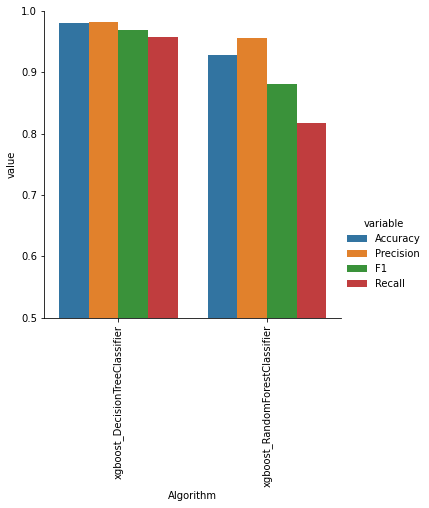

In [175]:
#generates a bar plot using Seaborn's catplot() function to visualize the accuracy, precision and f1 scores of the classifiers stored in the DataFrame 
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=xgb_performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# Set the max_features parameter to 3000 of TfIdf

In [184]:
#creates a new DataFrame temp_df with four columns: 'Algorithm', 'Accuracy_max_ft_3000', 'Precision_max_ft_3000', and 'F1_max_ft_3000'
xgb_temp_df = pd.DataFrame({'Algorithm':clfs1.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores,'F1_max_ft_3000':f1_scores, 'Recall_max_ft_3000':recall_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [185]:
xgb_temp_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000,F1_max_ft_3000,Recall_max_ft_3000
0,xgboost_DecisionTreeClassifier,0.979326,0.990025,0.967113,0.945238
1,xgboost_RandomForestClassifier,0.926493,0.955056,0.876289,0.809524


In [186]:
#function is used to transform the DataFrame performance_df from "wide" to "long" format. Specifically, it "unpivots" the DataFrame by melting the columns
xgb_temp_df1 = pd.melt(xgb_temp_df, id_vars = "Algorithm")


In [187]:
xgb_temp_df1

,Algorithm,variable,value
0,xgboost_DecisionTreeClassifier,Accuracy_max_ft_3000,0.979326
1,xgboost_RandomForestClassifier,Accuracy_max_ft_3000,0.926493
2,xgboost_DecisionTreeClassifier,Precision_max_ft_3000,0.990025
3,xgboost_RandomForestClassifier,Precision_max_ft_3000,0.955056
4,xgboost_DecisionTreeClassifier,F1_max_ft_3000,0.967113
5,xgboost_RandomForestClassifier,F1_max_ft_3000,0.876289
6,xgboost_DecisionTreeClassifier,Recall_max_ft_3000,0.945238
7,xgboost_RandomForestClassifier,Recall_max_ft_3000,0.809524


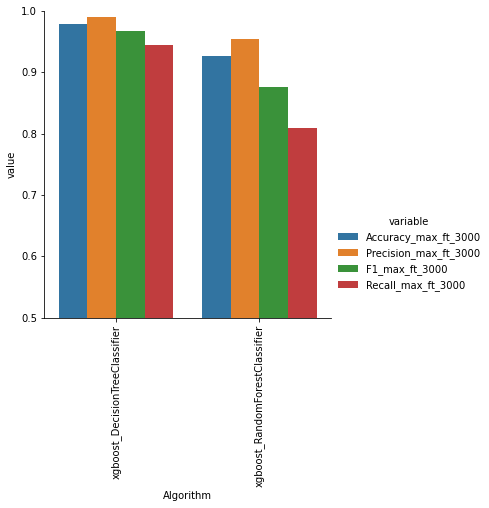

In [188]:
#generates a bar plot using Seaborn's catplot() function to visualize the accuracy, precision and f1 scores of the classifiers stored in the DataFrame 
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=xgb_temp_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [189]:
#merges the two DataFrames performance_df and temp_df on the 'Algorithm' column and creates a new DataFrame new_df.
xgb_new_df = xgb_performance_df.merge(xgb_temp_df,on='Algorithm')

In [190]:
xgb_new_df

,Algorithm,Accuracy,Precision,F1,Recall,Accuracy_max_ft_3000,Precision_max_ft_3000,F1_max_ft_3000,Recall_max_ft_3000
0,xgboost_DecisionTreeClassifier,0.980858,0.982885,0.969843,0.957143,0.979326,0.990025,0.967113,0.945238
1,xgboost_RandomForestClassifier,0.928790,0.955432,0.880616,0.816667,0.926493,0.955056,0.876289,0.809524
